In [19]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import requests
from pprint import pprint
from census import Census
import numpy as np
import json
from config1 import api_key


In [43]:
cities = "Raleigh"
states = "North Carolina"
countries = "USA"
key = api_key

url = "https://api.airvisual.com/v2/city?=city"

params = { "key" : api_key,
         "city" : cities,
          "state" : states,
          "country" : countries   
 }

response = requests.get(url, params=params).json()
pprint(response)

{'data': {'city': 'Raleigh',
          'country': 'USA',
          'current': {'pollution': {'aqicn': 41,
                                    'aqius': 86,
                                    'maincn': 'p2',
                                    'mainus': 'p2',
                                    'ts': '2019-10-03T13:00:00.000Z'},
                      'weather': {'hu': 100,
                                  'ic': '50d',
                                  'pr': 1017,
                                  'tp': 23,
                                  'ts': '2019-10-03T13:00:00.000Z',
                                  'wd': 315,
                                  'ws': 2.03}},
          'location': {'coordinates': [-78.574203, 35.856098], 'type': 'Point'},
          'state': 'North Carolina'},
 'status': 'success'}


In [49]:
cities = "New York"
states = "New York"
country= "USA"
key = api_key

url = "https://api.airvisual.com/v2/city?=city"

params = { "key" : api_key,
         "city" : cities,
          "state" : states,
          "country" : countries   
 }

response = requests.get(url, params=params).json()
pprint(response)

{'data': {'city': 'New York',
          'country': 'USA',
          'current': {'pollution': {'aqicn': 5,
                                    'aqius': 13,
                                    'maincn': 'p2',
                                    'mainus': 'p2',
                                    'ts': '2019-10-03T13:00:00.000Z'},
                      'weather': {'hu': 82,
                                  'ic': '10d',
                                  'pr': 1021,
                                  'tp': 12,
                                  'ts': '2019-10-03T13:00:00.000Z',
                                  'wd': 80,
                                  'ws': 6.7}},
          'location': {'coordinates': [-73.928596, 40.694401], 'type': 'Point'},
          'state': 'New York'},
 'status': 'success'}


In [65]:
url = "https://api.airvisual.com/v2/city?city="

city = ["Raleigh", "Asheville", "Charlotte", "Wilmington"] 

output = []

  
for c in city:
    query_url = url + c +"&state=North Carolina&country=USA&" + "&key=" + api_key  
    response = requests.get(query_url).json() 
    output.append(response)
pprint(output)

[{'data': {'city': 'Raleigh',
           'country': 'USA',
           'current': {'pollution': {'aqicn': 31,
                                     'aqius': 71,
                                     'maincn': 'p2',
                                     'mainus': 'p2',
                                     'ts': '2019-10-03T19:00:00.000Z'},
                       'weather': {'hu': 36,
                                   'ic': '01d',
                                   'pr': 1014,
                                   'tp': 35,
                                   'ts': '2019-10-03T19:00:00.000Z',
                                   'wd': 220,
                                   'ws': 1.5}},
           'location': {'coordinates': [-78.574203, 35.856098],
                        'type': 'Point'},
           'state': 'North Carolina'},
  'status': 'success'},
 {'data': {'city': 'Asheville',
           'country': 'USA',
           'current': {'pollution': {'aqicn': 20,
                                   

In [63]:
pprint(output)

[{'data': {'city': 'Raleigh',
           'country': 'USA',
           'current': {'pollution': {'aqicn': 42,
                                     'aqius': 87,
                                     'maincn': 'p2',
                                     'mainus': 'p2',
                                     'ts': '2019-10-03T15:00:00.000Z'},
                       'weather': {'hu': 66,
                                   'ic': '01d',
                                   'pr': 1016,
                                   'tp': 30,
                                   'ts': '2019-10-03T15:00:00.000Z',
                                   'wd': 338,
                                   'ws': 1.75}},
           'location': {'coordinates': [-78.574203, 35.856098],
                        'type': 'Point'},
           'state': 'North Carolina'},
  'status': 'success'},
 {'data': {'city': 'Asheville',
           'country': 'USA',
           'current': {'pollution': {'aqicn': 25,
                                  

In [72]:
city_name = []
country_name = []
air_quality = []
main_pollutant = []
humidity = []
pressure = []
temperature = []
wind_speed = []
date = []

# Select the variables
for i in range(len(output)):
    city_name.append(output[i]["data"]["city"])
    country_name.append(output[i]["data"]["country"])
    air_quality.append(output[i]["data"]["current"]["pollution"]["aqius"])
    humidity.append(output[i]["data"]["current"]["weather"]["hu"])
    pressure.append(output[i]["data"]["current"]["weather"]["pr"])
    temperature.append(output[i]["data"]["current"]["weather"]["tp"])
    wind_speed.append(output[i]["data"]["current"]["weather"]["ws"])
    date.append(output[i]["data"]["current"]["pollution"]["ts"])
    main_pollutant.append(output[i]["data"]["current"]["pollution"]["mainus"])

In [90]:
# create the dictionary to hold data
air_data = {"City": city_name,
             "Country": country_name,
             "Air Quality": air_quality,
             "Main Pollutant": main_pollutant,
             "Humidity": humidity,
             "Pressure": pressure,
             "Temperature": temperature,
             "Wind Speed": wind_speed,
             "Date": date
           }
# Convert dictionary to a dataframe
air_df = pd.DataFrame(air_data)
air_df

,City,Country,Air Quality,Main Pollutant,Humidity,Pressure,Temperature,Wind Speed,Date
0,Raleigh,USA,71,p2,36,1014,35,1.50,2019-10-03T19:00:00.000Z
1,Asheville,USA,54,p2,45,1022,30,1.50,2019-10-03T19:00:00.000Z
2,Charlotte,USA,57,p2,28,1016,35,2.60,2019-10-03T19:00:00.000Z
3,Wilmington,USA,86,p2,46,1014,33,1.45,2019-10-03T19:00:00.000Z


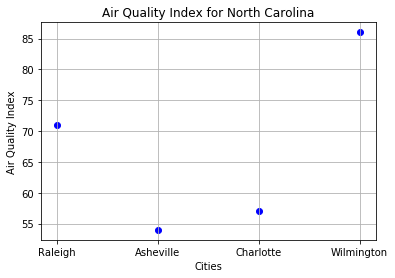

In [98]:
# Create a plot for air quality values
plt.scatter(air_df["City"], air_df["Air Quality"], marker = "o", color = "b")
plt.xlabel("Cities")
plt.ylabel("Air Quality Index")
plt.title("Air Quality Index for North Carolina")
plt.grid()
